In [2]:
!pip install schemdraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
from sklearn.linear_model import SGDClassifier
from schemdraw.parsing import logicparse

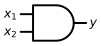

In [5]:
logicparse('$x_1$ and $x_2$', outlabel='$y$')  # 論理積 and

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])
mAND = SGDClassifier(loss='log_loss')
mAND.fit(X, Y)

SGDClassifier(loss='log_loss')

In [8]:
mAND.predict(X)

array([0, 0, 0, 1])

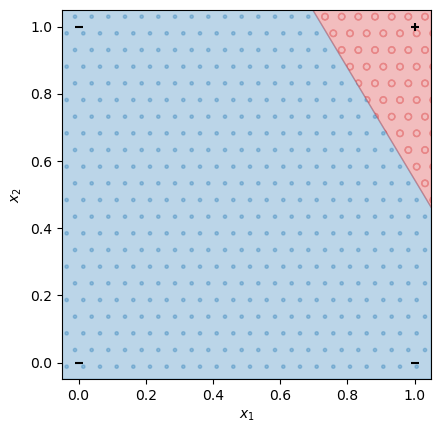

In [9]:
def draw_decision_area(ax, model, X, vmin, vmax):
    w1, w2 = model.coef_[0]
    bias = model.intercept_[0]
    a = -w1 / w2
    b = -bias / w2
    if bias <= 0:
        ax.fill_between(X, vmin, a * X + b, color='tab:blue', hatch='.', alpha=0.3)
        ax.fill_between(X, a * X + b, vmax, color='tab:red', hatch='o', alpha=0.3)
    else:
        ax.fill_between(X, vmin, a * X + b, color='tab:red', hatch='o', alpha=0.3)
        ax.fill_between(X, a * X + b, vmax, color='tab:blue', hatch='.', alpha=0.3)
        
def draw_points(ax, Xp, Yp):
    colors = np.array(["tab:blue", "tab:red"])
    I = np.where(Yp == 0)
    ax.scatter(Xp[I,0], Xp[I,1], c='black', marker='_')
    I = np.where(Yp == 1)
    ax.scatter(Xp[I,0], Xp[I,1], c='black', marker='+')

def show_decisions(model, Xp, Yp, N=400):
    vmin = -0.05
    vmax = 1.05
    fig, ax = plt.subplots(dpi=100)
    ax.set_aspect('equal')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    X = np.linspace(vmin, vmax, N)
    draw_decision_area(ax, model, X, vmin, vmax)
    draw_points(ax, Xp, Yp)
    plt.show()

show_decisions(mAND, X, Y)

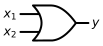

In [10]:
logicparse('$x_1$ or $x_2$', outlabel='$y$') # 論理和 or

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])
mOR = SGDClassifier(loss='log_loss')
mOR.fit(X, Y)

SGDClassifier(loss='log_loss')

In [12]:
mOR.predict(X)

array([0, 1, 1, 1])

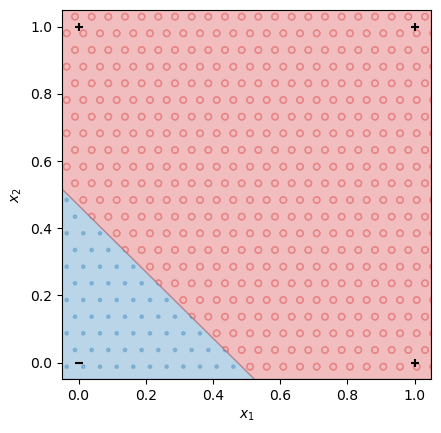

In [13]:
show_decisions(mOR, X, Y)

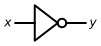

In [14]:
logicparse('not $x$', outlabel='$y$') # 否定 not

In [15]:
X = np.array([[0], [1]])
Y = np.array([1, 0])
mNOT = SGDClassifier(loss='log_loss')
mNOT.fit(X, Y)

SGDClassifier(loss='log_loss')

In [16]:
mNOT.predict(X)

array([1, 0])

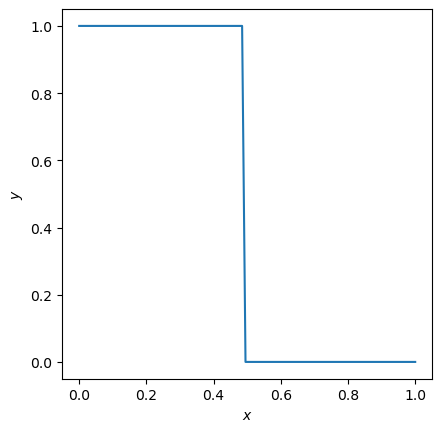

In [17]:
N = 100
X = np.linspace(0, 1, N).reshape(N, -1)
P = mNOT.predict(X)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.plot(X, P)
plt.show()

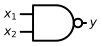

In [18]:
logicparse('$x_1$ nand $x_2$', outlabel='$y$') # 否定論理積 not and

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([1, 1, 1, 0])
mNAND = SGDClassifier(loss='log_loss')
mNAND.fit(X, Y)

SGDClassifier(loss='log_loss')

In [22]:
mNAND.predict(X)

array([1, 0, 0, 0])

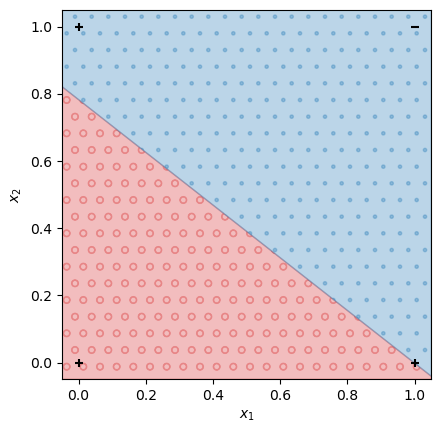

In [23]:
show_decisions(mNAND, X, Y)

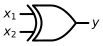

In [24]:
logicparse('$x_1$ xor $x_2$', outlabel='$y$') #排他的論理和 xor

In [26]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
mXOR = SGDClassifier(loss='log_loss')
mXOR.fit(X, Y)

SGDClassifier(loss='log_loss')

In [29]:
mXOR.predict(X) # 学習で得られたモデルは排他的論理和の入出力を再現できていない。

array([0, 0, 0, 0])

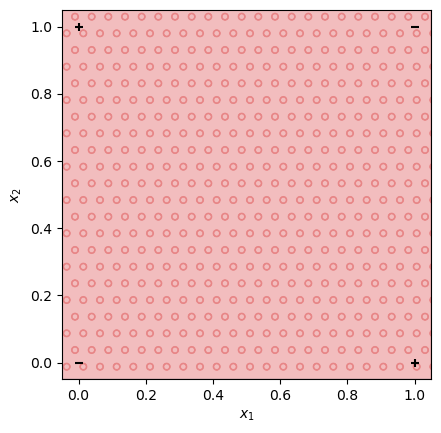

In [30]:
show_decisions(mXOR, X, Y)

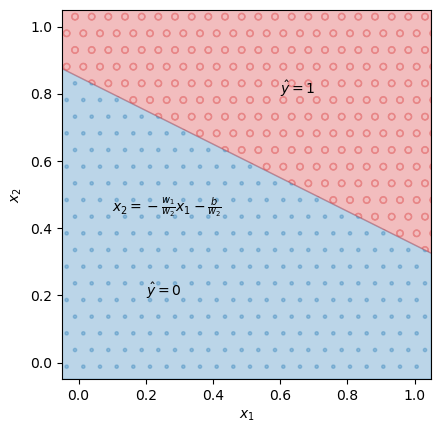

In [31]:
class Model: pass

model = Model()
model.coef_ = np.array([[1., 2.]])
model.intercept_ = np.array([-1.7])

N = 400
vmin = -0.05
vmax = 1.05
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
X = np.linspace(vmin, vmax, N)
draw_decision_area(ax, model, X, vmin, vmax)

ax.text(0.6, 0.8, '$\hat{y} = 1$')
ax.text(0.2, 0.2, '$\hat{y} = 0$')
ax.text(0.1, 0.45, r'$x_2 = -\frac{w_1}{w_2}x_1 -\frac{b}{w_2}$')
plt.show()

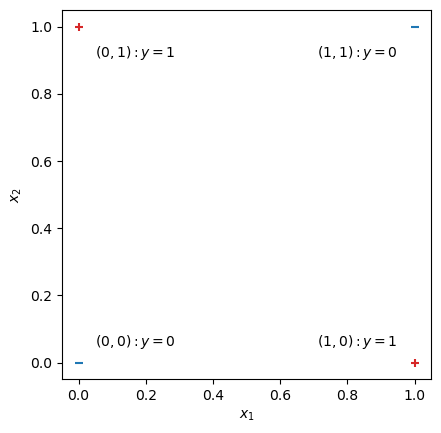

In [32]:
X = np.linspace(0, 1, 100)
Y = -0.4 * X + 0.7

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.scatter([0, 1], [0, 1], c='tab:blue', marker='_')
ax.scatter([0, 1], [1, 0], c='tab:red', marker='+')
ax.text(0.05, 0.05, r'$(0, 0): y = 0$')
ax.text(0.05, 0.95, r'$(0, 1): y = 1$', va='top')
ax.text(0.95, 0.05, r'$(1, 0): y = 1$', ha='right')
ax.text(0.95, 0.95, r'$(1, 1): y = 0$', va='top', ha='right')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

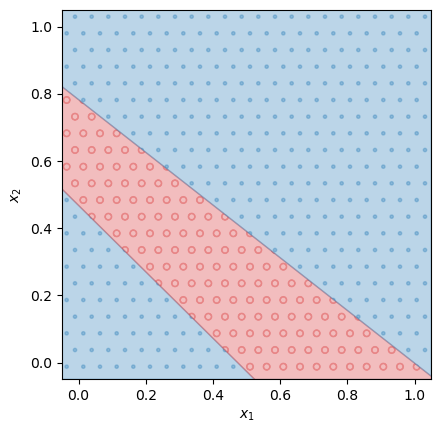

In [35]:
N = 400
vmin = -0.05
vmax = 1.05

X0 = np.linspace(vmin, vmax, N)
w1, w2 = mOR.coef_[0]
bias = mOR.intercept_[0]
a = -w1 / w2
b = -bias / w2
Y1 = a * X0 + b

w1, w2 = mNAND.coef_[0]
bias = mNAND.intercept_[0]
a = -w1 / w2
b = -bias / w2
Y2 = a * X0 + b

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.fill_between(X0, vmin, Y1, color='tab:blue', hatch='.', alpha=0.3)
ax.fill_between(X0, Y1, Y2, color='tab:red', hatch='o', alpha=0.3)
ax.fill_between(X0, Y2, vmax, color='tab:blue', hatch='.', alpha=0.3)
draw_points(ax, X, Y)
plt.show()

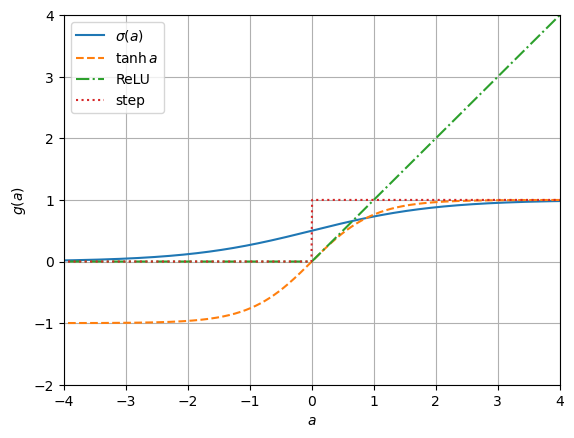

In [36]:
fig, ax = plt.subplots(dpi=100)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / (1 + np.exp(-x)), label='$\sigma(a)$', ls='-')
ax.plot(x, (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)), label=r'$\tanh a$', ls='--')
ax.plot(x, np.maximum(x, 0), label='ReLU', ls='-.')
ax.plot(x, np.heaviside(x, 0), label='step', ls=':')
ax.set_xlabel('$a$')
ax.set_ylabel('$g(a)$')
ax.set_xlim(-4, 4)
ax.set_ylim(-2, 4)
ax.legend()
ax.grid()
plt.show()

In [37]:
w_xh = np.array([
    [1, -1],
    [1, -1]
])
b_xh = np.array([-0.5, 1.5])
w_hy = np.array([
    1,
    1
])
b_hy = np.array([-1.5])

In [38]:
x = np.array([1, 1])

In [39]:
h = np.heaviside(x @ w_xh + b_xh, 0)
h

array([1., 0.])

In [40]:
y = np.heaviside(h @ w_hy + b_hy, 0)
y

array([0.])

In [41]:
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [42]:
h = np.heaviside(x @ w_xh + b_xh, 0)
h

array([[0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.]])

In [43]:
y = np.heaviside(h @ w_hy + b_hy, 0)
y

array([0., 1., 1., 0.])

In [44]:
def f(x, v, w, b):
    def sigmoid(x):  
        return np.exp(-np.logaddexp(0, -x))
    return np.dot(sigmoid(np.outer(x, w) + b), v)

In [45]:
def init_graph(xmin, xmax, ymin, ymax):
    fig, ax = plt.subplots(dpi=150)
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(range(xmin, xmax+1, 2))
    ax.set_xticks(range(xmin, xmax+1, 1), minor=True)
    ax.set_ylim(ymin, ymax)
    ax.grid()
    return fig, ax

xmin, xmax = -10, 10
X = np.linspace(xmin, xmax, 1000)

In [46]:
v = np.array([1.])
b = np.array([0.])
WP = np.arange(-8, 9)

fig, ax = init_graph(xmin, xmax, -0.5, 1.5)

A = []
for wp in WP:
    artists = []
    artists += ax.plot(X, f(X, v, 2. ** wp, b), color='tab:blue')
    artists.append(ax.text(0, -0.4, f'$w = 2^{{ {wp} }}$', ha='center'))
    A.append(artists)

ani = matplotlib.animation.ArtistAnimation(fig, A, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

In [47]:
v = np.array([1.])
B = np.arange(-8, 9)
w = np.array([1.])

fig, ax = init_graph(xmin, xmax, -0.5, 1.5)

A = []
for b in B:
    artists = []
    artists += ax.plot(X, f(X, v, w, b), color='tab:blue')
    artists.append(ax.axvline(-b, ls=':'))
    artists.append(ax.text(0, -0.4, f'$b = {b}$', ha='center'))
    A.append(artists)

ani = matplotlib.animation.ArtistAnimation(fig, A, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

In [48]:
b = 0.
w = 1.
v = 1.
V = np.arange(-8., 8)

ymin, ymax = -10, 10
fig, ax = init_graph(xmin, xmax, ymin, ymax)
ax.set_yticks(range(ymin, ymax+1, 2))
ax.set_yticks(range(ymin, ymax+1, 1), minor=True)

A = []
for v in V:
    artists = []
    artists += ax.plot(X, f(X, v, w, b), color='tab:blue')
    artists.append(ax.text(0, -9, f'$v = {v}$', ha='center'))
    A.append(artists)

ani = matplotlib.animation.ArtistAnimation(fig, A, interval=200)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

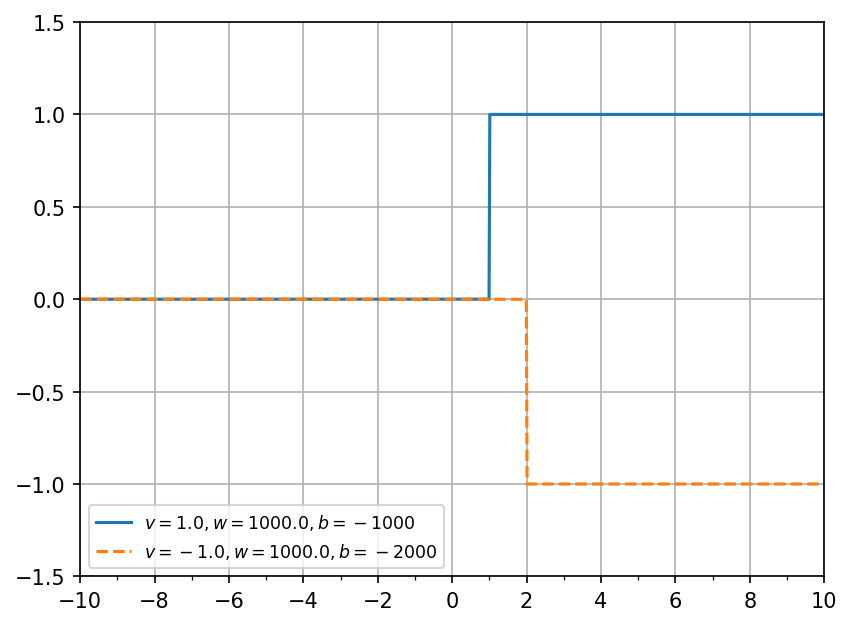

In [49]:
params = [
    # v, w, b, ls
    [1., 1000., -1000, '-'],
    [-1., 1000., -2000, '--'],
]

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
for v, w, b, ls in params:
    ax.plot(X, f(X, v, w, b), ls=ls, label=f'$v = {v}, w = {w}, b = {b}$')
ax.legend(fontsize='small', loc='lower left')
plt.show()

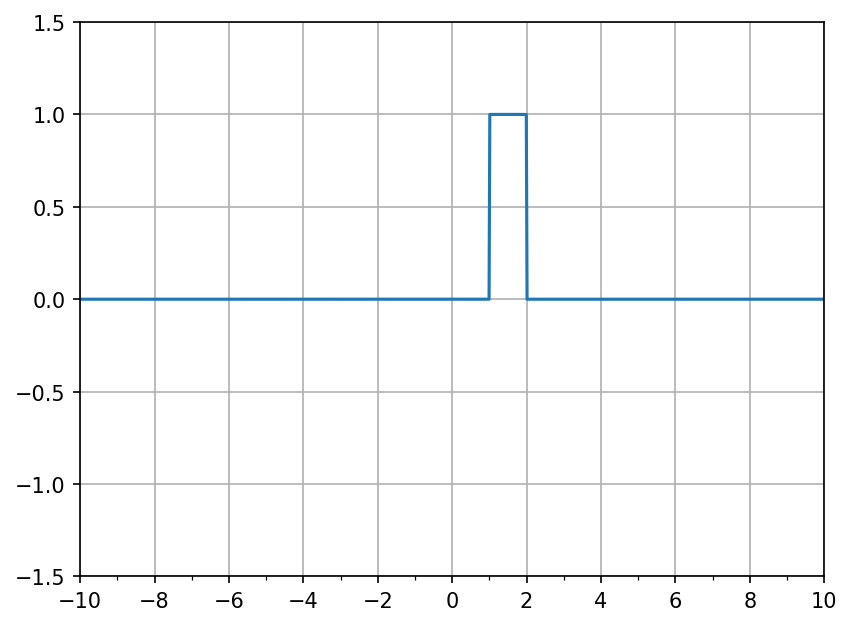

In [50]:
v = np.array([1, -1])
w = np.array([1000, 1000])
b = np.array([-1000, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()

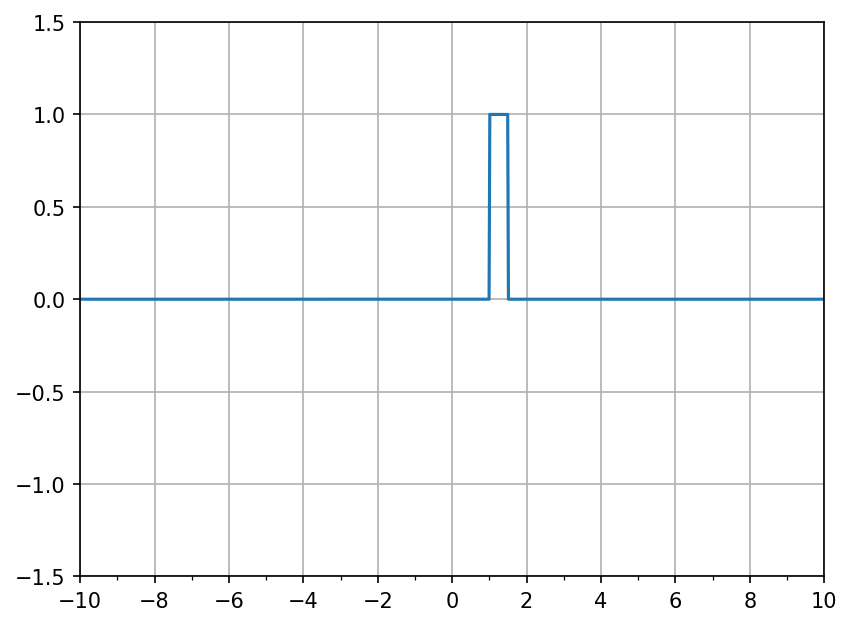

In [51]:
v = np.array([1, -1])
w = np.array([1000, 1000])
b = np.array([-1000, -1500])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()

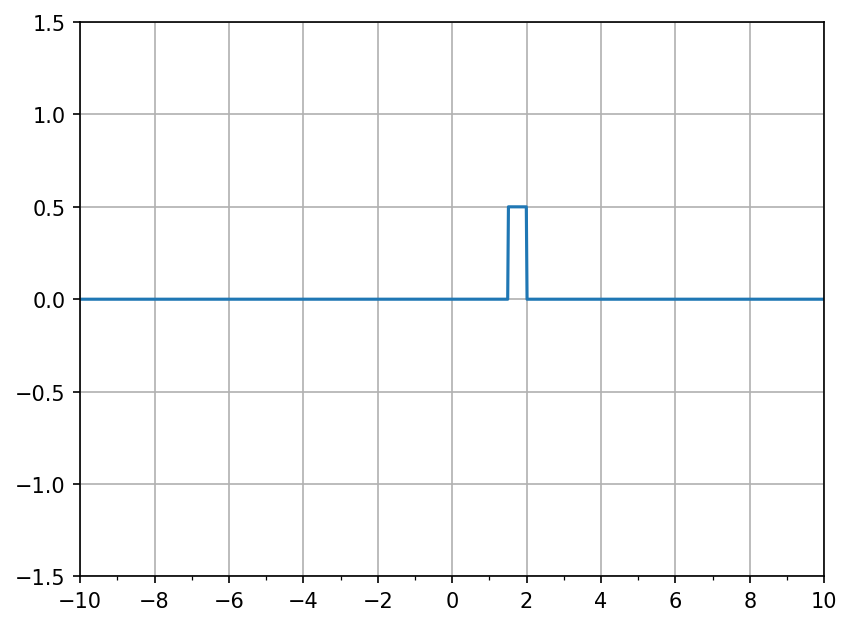

In [52]:
v = np.array([0.5, -0.5])
w = np.array([1000, 1000])
b = np.array([-1500, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()

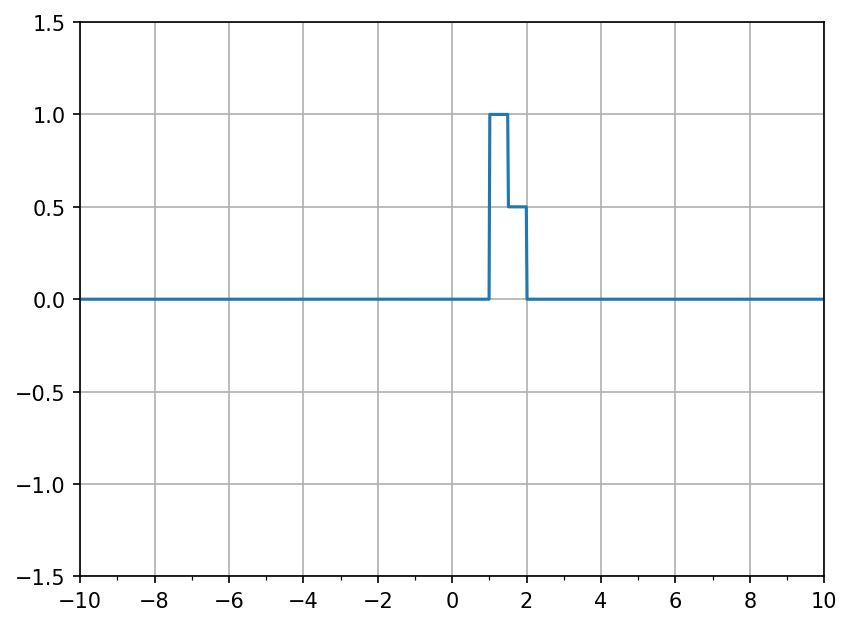

In [53]:
v = np.array([1, -1, 0.5, -0.5])
w = np.array([1000, 1000, 1000, 1000])
b = np.array([-1000, -1500, -1500, -2000])

fig, ax = init_graph(xmin, xmax, -1.5, 1.5)
ax.plot(X, f(X, v, w, b))
plt.show()

In [58]:
def G(x):
    if -5 <= x < 4:
        i = int(x + 5)
        return [-1, 0, 1, 0, -1, 1, 0, 1, -1][i]
    else:
        return 0

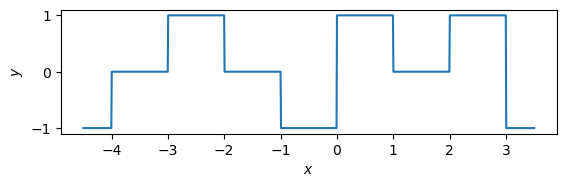

In [59]:
def plot(ax, f):
    X = np.linspace(-4.5, 3.5, 1000)
    Y = f(X)
    
    ax.plot(X, Y, '-')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_aspect('equal')

fig, ax = plt.subplots()
g = np.vectorize(G)
plot(ax, g)
plt.show()

In [60]:
def find_renderer(fig):
    if hasattr(fig.canvas, "get_renderer"):
        renderer = fig.canvas.get_renderer()
    else:
        import io
        fig.canvas.print_pdf(io.BytesIO())
        renderer = fig._cachedRenderer
    return renderer

def draw_variable(ax, x, y, s, requires_grad=False):
    bbox = bbox=dict(boxstyle='circle', fill=False, linewidth=0.5) if requires_grad else None
    return ax.text(x, y, s, bbox=bbox, ha='center', va='center', fontsize=config['variable-font-size'])
    
def draw_operator(ax, x, y, s):
    return ax.text(x, y, s, bbox=dict(boxstyle='square', fill=False, linewidth=0.5), ha='center', va='center', fontsize=config['operator-font-size'])

def draw_arrow(ax, x0, x1, y0, y1, style='arrow'):
    cstyle = 'arc3'
    if style == 'below':
        cstyle = 'angle,angleA=0,angleB=90,rad=0.0'
    elif style == 'above':
        cstyle = 'angle,angleA=0,angleB=-90,rad=0.0'        
    ax.annotate(
        "",
        xy=(x1, y1), xycoords='data',
        xytext=(x0, y0), textcoords='data',
        arrowprops=dict(arrowstyle="-|>,head_length=0.2,head_width=0.1", connectionstyle=cstyle, facecolor='black', linewidth=0.5),
        )

def write_message(msg):
    A = []
    p = msg.find(r' \\ ')
    if p != -1:
        msg1 = msg[:p]
        msg2 = msg[p+4:]
        A.append(ax.text(config['message-x'], config['message-y'], msg1, ha='center', va='center', fontsize=config['message-font-size']))
        A.append(ax.text(config['message-x'], config['message-y']-0.5, msg2, ha='center', va='center', fontsize=config['message-font-size']))
    else:
        A.append(ax.text(config['message-x'], config['message-y'], msg, ha='center', va='center', fontsize=config['message-font-size']))
    return A

def write_value(x, y, v, name, updated=False, backward=False):
    A = []
    c = 'tab:red' if updated else ('tab:blue' if backward else 'tab:gray')
    if name is not None:
        A.append(ax.text(x, y+0.2, name, ha='center', va='center', fontsize=config['value-font-size'], color=c))
    A.append(ax.text(x, y, v, ha='center', va='center', fontsize=config['value-font-size'], color=c))
    return A

def forward(ax, S, t):    
    artists = []
    backward = False
    for i in range(1, t+1):
        s = S[i-1]
        if s is None or len(s) < 4:
            continue
        if s[0] == 'Backward pass':
            backward = True
        name = s[4] if len(s) >= 5 else None
        artists += write_value(s[1], s[2], s[3], name, t==i, backward)
            
    s = S[t-1]
    if s is not None:
        artists += write_message(s[0])
    
    return artists

config = {
    'variable-font-size': 10,
    'operator-font-size': 8,
    'message-font-size': 10,
    'value-font-size': 10,
    'message-x': 3,
    'message-y': 1,
}

def draw_computation_graph(ax):
    draw_variable(ax, 1, 4, '$a$', requires_grad=True)
    draw_variable(ax, 0.5, 4, '$-2$')
    draw_variable(ax, 1, 3, '$x$', requires_grad=True)
    draw_variable(ax, 0.5, 3, '$3$')
    draw_variable(ax, 1, 2, '$b$', requires_grad=True)
    draw_variable(ax, 0.5, 2, '$4$')
    draw_variable(ax, 3.3, 4, r'$\alpha = ax$')
    draw_variable(ax, 5.5, 2.7, r'$y$')
    draw_operator(ax, 2.5, 3.5, r'$\times$')
    draw_operator(ax, 4, 2.7, '$+$')
    draw_arrow(ax, 1.15, 2.5, 3, 3.4, 'below')
    draw_arrow(ax, 1.15, 2.5, 4, 3.6, 'above')
    draw_arrow(ax, 1.15, 4, 2, 2.6, 'below')
    draw_arrow(ax, 2.6, 4, 3.5, 2.8, 'above')
    draw_arrow(ax, 4.1, 5.4, 2.7, 2.7)

S = [
    [r'Forward pass'],
    [r'$a \cdot x = (-2) \times 3 = -6$', 3.3, 3.7, r'-6'],
    [r'$ax + b = -6 + 4 = -2$', 4.7, 2.9, '-2'],
    None,
    [r'Backward pass', 4.7, 2.4, '1'],
    [r'$y = \alpha + b$, $\frac{\partial y}{\partial \alpha} = 1$', 3.3, 3.2, r'$\frac{\partial y}{\partial \alpha} = 1$'],
    [r'$y = \alpha + b$, $\frac{\partial y}{\partial b} = 1$', 2.7, 1.7, r'$\frac{\partial y}{\partial b} = 1$'],
    [r'$\alpha = ax$, $\frac{\partial \alpha}{\partial a} = x$, $\frac{\partial y}{\partial a} = \frac{\partial y}{\partial \alpha}\cdot\frac{\partial \alpha}{\partial a}=1 \times 3 = 3$', 1.8, 3.7, r'$\frac{\partial y}{\partial a}=3$'],
    [r'$\alpha = ax$, $\frac{\partial \alpha}{\partial x} = a$, $\frac{\partial y}{\partial x} = \frac{\partial y}{\partial \alpha}\cdot\frac{\partial \alpha}{\partial x}=1 \times (-2) = -2$', 1.9, 2.7, r'$\frac{\partial y}{\partial x}=-2$'],
    None,
]

fig, ax = plt.subplots(dpi=200, figsize=(4, 3), frameon=False)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.box(False)
plt.axis('off')
ax.set_aspect('equal')
ax.set_xlim(0.2, 5.8)
ax.set_ylim(0.4, 4.5)
draw_computation_graph(ax)

#forward(ax, S, 10)
#plt.show()

A = []
for t in range(3+1):
    A.append(forward(ax, S, t))
    
ani = matplotlib.animation.ArtistAnimation(fig, A, interval=2000)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

In [62]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3), frameon=False)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.box(False)
plt.axis('off')
ax.set_aspect('equal')
ax.set_xlim(0.2, 5.8)
ax.set_ylim(0.4, 4.5)
draw_computation_graph(ax)

A = []
for t in range(4, len(S)+1):
    A.append(forward(ax, S, t))
    
ani = matplotlib.animation.ArtistAnimation(fig, A, interval=2000)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

In [63]:
config = {
    'variable-font-size': 6,
    'operator-font-size': 6,
    'message-font-size': 7,
    'value-font-size': 5,
    'message-x': 6.0,
    'message-y': 4.1,
}

fig, ax = plt.subplots(dpi=200, figsize=(4, 2))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.box(False)
plt.axis('off')
ax.set_aspect('equal')
ax.set_xlim(0.2, 10.3)
ax.set_ylim(0.4, 4.7)

draw_variable(ax, 1, 4, '$w_1$', requires_grad=True)
draw_variable(ax, 0.5, 4, '$1$')
draw_variable(ax, 1, 3, '$x_1$')
draw_variable(ax, 0.5, 3, '$1$')
draw_variable(ax, 1, 2, '$w_2$', requires_grad=True)
draw_variable(ax, 0.5, 2, '$0.5$')
draw_variable(ax, 1, 1, '$x_2$')
draw_variable(ax, 0.5, 1, '$-1$')
draw_variable(ax, 4, 1.5, '$-1$')
draw_variable(ax, 6, 1.5, '$1$')
draw_variable(ax, 9, 1.5, '$-1$')
draw_operator(ax, 2, 1.5, r'$\times$')
draw_operator(ax, 2, 3.5, r'$\times$')
draw_operator(ax, 3, 2.5, '$+$')
draw_operator(ax, 4, 2.5, r'$\times$')
draw_operator(ax, 5, 2.5, r'$\exp$')
draw_operator(ax, 6, 2.5, '$+$')
draw_operator(ax, 7, 2.5, '$1/a$')
draw_operator(ax, 8, 2.5, r'$\log$')
draw_operator(ax, 9, 2.5, r'$\times$')
draw_variable(ax, 10, 2.5, '$\hat{l}$')
draw_arrow(ax, 1.15, 2, 1, 1.4, 'below')
draw_arrow(ax, 1.15, 2, 2, 1.6, 'above')
draw_arrow(ax, 1.15, 2, 3, 3.4, 'below')
draw_arrow(ax, 1.15, 2, 4, 3.6, 'above')
draw_arrow(ax, 2.1, 3, 1.5, 2.4, 'below')
draw_arrow(ax, 2.1, 3, 3.5, 2.6, 'above')
draw_arrow(ax, 3.1, 3.9, 2.5, 2.5)
draw_arrow(ax, 4, 4, 1.7, 2.4)
draw_arrow(ax, 4.1, 4.8, 2.5, 2.5)
draw_arrow(ax, 5.2, 5.9, 2.5, 2.5)
draw_arrow(ax, 6, 6, 1.7, 2.4)
draw_arrow(ax, 6.1, 6.8, 2.5, 2.5)
draw_arrow(ax, 7.2, 7.8, 2.5, 2.5)
draw_arrow(ax, 8.2, 8.9, 2.5, 2.5)
draw_arrow(ax, 9, 9, 1.7, 2.4)
draw_arrow(ax, 9.1, 9.9, 2.5, 2.5)

S = [
    [r'Forward pass'],
    [r'$w_1 x_1 = 1 \times 1 = 1$', 2.55, 3.7, '1', r'$\alpha$'],
    [r'$w_2 x_2 = 0.5 \times -1 = -0.5$', 2.55, 1.7, '-0.5', r'$\beta$'],
    [r'$1 + (-0.5) = 0.5$', 3.5, 2.8, '0.5', r'$\mu$'],
    [r'$0.5 \times (-1) = -0.5$', 4.5, 2.8, '-0.5', r'$\nu$'],
    [r'$\exp (-0.5) = 0.6065$', 5.5, 2.8, '0.6065', r'$\xi$'],
    [r'$0.6065 + 1 = 1.6065$', 6.5, 2.8, '1.6065', r'$\pi$'],
    [r'$\frac{1}{1.6065} = 0.6225$', 7.5, 2.8, '0.6225', r'$\rho$'],
    [r'$\log (0.6225) = -0.4740$', 8.5, 2.8, '-0.4740', r'$\phi$'],
    [r'$(-0.4740) \times (-1) = 0.4740$', 9.5, 2.8, '0.4740'],
    None,
    [r'Backward pass', 9.5, 2.1, '1'],
    [r'$\frac{\partial \hat{l}}{\partial \phi} = \frac{\partial }{\partial \phi} (-\phi) = -1$', 8.5, 2.1, '-1'],
    [r'$\frac{\partial \phi}{\partial \rho} = \frac{\partial }{\partial \rho} (\log \rho) = \frac{1}{\rho} = \frac{1}{0.6225} = 1.6065$ \\ $\frac{\partial \hat{l}}{\partial \rho} = \frac{\partial \hat{l}}{\partial \phi} \frac{\partial \phi}{\partial \rho} = -1 \times 1.6065 = -1.6065$', 7.5, 2.1, '-1.6065'],
    [r'$\frac{\partial \rho}{\partial \pi} = \frac{\partial }{\partial \pi} (\frac{1}{\pi}) = -\frac{1}{\pi^2} = -\frac{1}{1.6065^2} = -0.3875$ \\ $\frac{\partial \hat{l}}{\partial \pi} = \frac{\partial \hat{l}}{\partial \rho} \frac{\partial \rho}{\partial \pi} = -1.6065 \times (-0.3875) = 0.6224$', 6.5, 2.1, '0.6224'],
    [r'$\frac{\partial \pi}{\partial \xi} = \frac{\partial }{\partial \xi} (\xi + 1) = 1$ \\ $\frac{\partial \hat{l}}{\partial \xi} = \frac{\partial \hat{l}}{\partial \pi} \frac{\partial \pi}{\partial \xi} = 0.6224 \times 1 = 0.6224$', 5.5, 2.1, '0.6224'],
    [r'$\frac{\partial \xi}{\partial \nu} = \frac{\partial }{\partial \nu} (e^{\nu}) = e^{\nu} = e^{-0.5} = 0.6065$ \\ $\frac{\partial \hat{l}}{\partial \nu} = \frac{\partial \hat{l}}{\partial \xi} \frac{\partial \xi}{\partial \nu} = 0.6224 \times 0.6065 = 0.3775$', 4.5, 2.1, '0.3775'],
    [r'$\frac{\partial \nu}{\partial \mu} = \frac{\partial }{\partial \mu} (-\mu) = -1$ \\ $\frac{\partial \hat{l}}{\partial \mu} = \frac{\partial \hat{l}}{\partial \nu} \frac{\partial \nu}{\partial \mu} = 0.3775 \times (-1) = -0.3775$', 3.5, 2.1, '-0.3775'],
    [r'$\frac{\partial \mu}{\partial \alpha} = \frac{\partial }{\partial \alpha} (\alpha + \beta) = 1$ \\ $\frac{\partial \hat{l}}{\partial \alpha} = \frac{\partial \hat{l}}{\partial \mu} \frac{\partial \mu}{\partial \alpha} = -0.3775 \times 1 = -0.3775$', 2.55, 3.3, '-0.3775'],
    [r'$\frac{\partial \mu}{\partial \beta} = \frac{\partial }{\partial \beta} (\alpha + \beta) = 1$ \\ $\frac{\partial \hat{l}}{\partial \beta} = \frac{\partial \hat{l}}{\partial \mu} \frac{\partial \mu}{\partial \beta} = -0.3775 \times 1 = -0.3775$', 2.55, 1.3, '-0.3775'],
    [r'$\frac{\partial \alpha}{\partial w_1} = \frac{\partial }{\partial w_1} (w_1x_1) = x_1 = 1$ \\ $\frac{\partial \hat{l}}{\partial w_1} = \frac{\partial \hat{l}}{\partial \alpha} \frac{\partial \alpha}{\partial w_1} = -0.3775 \times 1 = -0.3775$', 1.55, 3.8, '-0.3775'],
    [r'$\frac{\partial \alpha}{\partial x_1} = \frac{\partial }{\partial w_1} (w_1x_1) = w_1 = 1$ \\ $\frac{\partial \hat{l}}{\partial x_1} = \frac{\partial \hat{l}}{\partial \alpha} \frac{\partial \alpha}{\partial x_1} = -0.3775 \times 1 = -0.3775$', 1.55, 2.8, '-0.3775'],
    [r'$\frac{\partial \beta}{\partial w_2} = \frac{\partial }{\partial w_2} (w_2x_2) = x_2 = -1$ \\ $\frac{\partial \hat{l}}{\partial w_2} = \frac{\partial \hat{l}}{\partial \beta} \frac{\partial \beta}{\partial w_2} = -0.3775 \times (-1) = 0.3775$', 1.55, 1.8, '0.3775'],
    [r'$\frac{\partial \beta}{\partial x_2} = \frac{\partial }{\partial w_2} (w_2x_2) = w_2 = 0.5$ \\ $\frac{\partial \hat{l}}{\partial x_2} = \frac{\partial \hat{l}}{\partial \beta} \frac{\partial \beta}{\partial x_2} = -0.3775 \times 0.5 = -0.1887$', 1.55, 0.8, '-0.1887'],
    None,
]

A = []
for t in range(len(S)+1):
    A.append(forward(ax, S, t))
    
ani = matplotlib.animation.ArtistAnimation(fig, A, interval=2000)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

In [65]:
!pip install autograd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.6 MB/s eta 0:00:00


In [66]:
import autograd
import autograd.numpy as np

def loss(w, x):
    return -np.log(1.0 / (1 + np.exp(-np.dot(x, w))))

x = np.array([1, -1])
w = np.array([1.0, 0.5])

grad_loss = autograd.grad(loss)
print(loss(w, x))
print(grad_loss(w, x))

0.47407698418010663
[-0.37754067  0.37754067]


In [67]:
import torch

x = torch.tensor([1, -1], dtype=torch.float)
w = torch.tensor([1.0, 0.5], dtype=torch.float, requires_grad=True)

loss = -torch.dot(x, w).sigmoid().log()
loss.backward()
print(loss.item())
print(w.grad)

0.4740769565105438
tensor([-0.3775,  0.3775])


In [69]:
import torch

def init_graph(X, dpi=100, figsize=(6,6)):
    xmin, xmax = X[:,0].min()-0.5, X[:,0].max()+0.5
    ymin, ymax = X[:,1].min()-0.5, X[:,1].max()+0.5

    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return fig, ax

def plot_data(ax, X, Y):
    I = np.where(Y == 0)
    ax.scatter(X[I,0], X[I,1], c='tab:blue', marker='_')
    I = np.where(Y == 1)
    ax.scatter(X[I,0], X[I,1], c='tab:red', marker='+')
    
def draw_heatmap(fig, ax, func, step=1, N=1024):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    XX, YY = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))
    XY = np.vstack([XX.ravel(), YY.ravel()]).T

    X_ = torch.from_numpy(XY).type(dtype)
    Y_ = func(X_).detach().numpy().copy()
    C = Y_.reshape(XX.shape)

    vmin, vmax = C.min(), C.max()
    vmin = ((vmin // step) - 1) * step
    vmax = ((vmax // step) + 1) * step
    width = max(abs(vmin), abs(vmax))
    
    mesh = ax.pcolormesh(XX, YY, C, norm=matplotlib.colors.Normalize(vmin=-width, vmax=width), cmap='bwr', shading='auto', alpha=0.2)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Output value')
    
    cont = ax.contour(XX, YY, C, colors='tab:gray', linewidths=0.5, linestyles='dashed', levels=np.arange(vmin, vmax+1, step))
    cont.clabel(fmt='%1.1f')

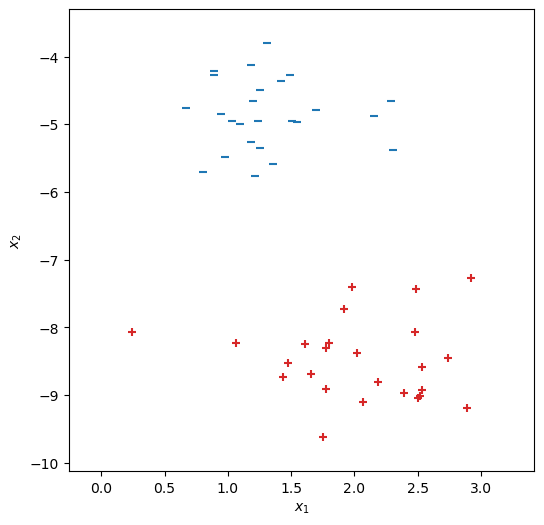

In [70]:
from sklearn.datasets import make_blobs
D = make_blobs(n_samples=50, centers=2, random_state=129, cluster_std=.6)

fig, ax = init_graph(D[0])
plot_data(ax, D[0], D[1])
plt.show()

In [71]:
from torch.utils.data import TensorDataset, DataLoader

dtype = torch.float
X = torch.from_numpy(D[0]).type(dtype)
Y = torch.from_numpy(D[1].reshape(-1, 1)).type(dtype)

In [72]:
X[:4]

tensor([[ 2.4885, -7.4323],
        [ 1.4338, -8.7279],
        [ 2.1874, -8.8029],
        [ 1.1995, -4.6490]])

In [74]:
Y[:4]

tensor([[1.],
        [1.],
        [1.],
        [0.]])

In [75]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Parameters of the single-layer neural network.
w = torch.randn(2, 1, dtype=dtype, requires_grad=True)
b = torch.randn(1, dtype=dtype, requires_grad=True)

H = []
eta = 0.01
for t in range(1000):
    sumloss = 0.
    for x, y in loader:
        y_hat = (x.matmul(w) + b).sigmoid()
        l = y * y_hat + (1 - y) * (1 - y_hat)
        loss = -l.log().sum()
        sumloss += loss.item()

        loss.backward()
        with torch.no_grad():
            w -= eta * w.grad
            b -= eta * b.grad
            w.grad.zero_()
            b.grad.zero_()
            
    H.append(sumloss)

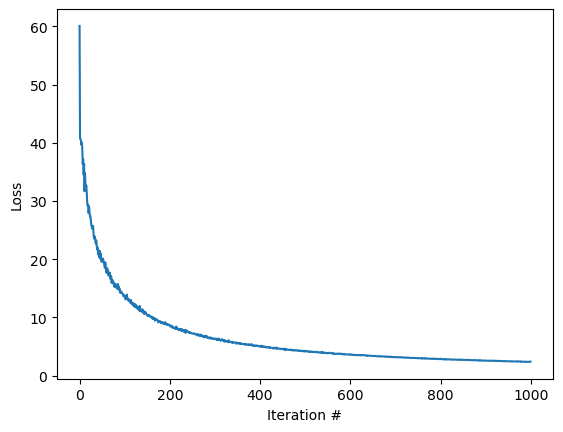

In [76]:
fig, ax = plt.subplots()
ax.plot(H)
ax.set_xlabel('Iteration #')
ax.set_ylabel('Loss')
plt.show()

In [77]:
w, b

(tensor([[ 0.3033],
         [-1.9238]], requires_grad=True),
 tensor([-13.0120], requires_grad=True))

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_80542/3915955710.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/torch/csrc/utils/tensor_new.cpp:204.)
  ax.scatter(X[I,0], X[I,1], c='tab:blue', marker='_')


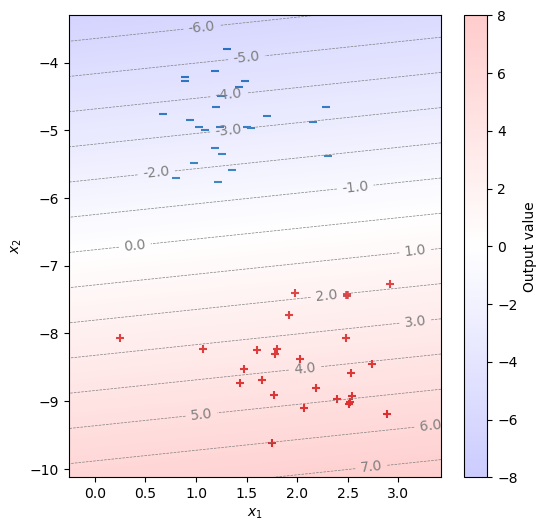

In [78]:
def model(x):
    return x.matmul(w) + b

fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model)
plt.show()

In [79]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Single-layer NN: 2 -> 1
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()

eta = 0.1
for t in range(1000):
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= eta * param.grad

In [80]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [81]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.5737, -2.5437]])),
             ('0.bias', tensor([-17.4737]))])

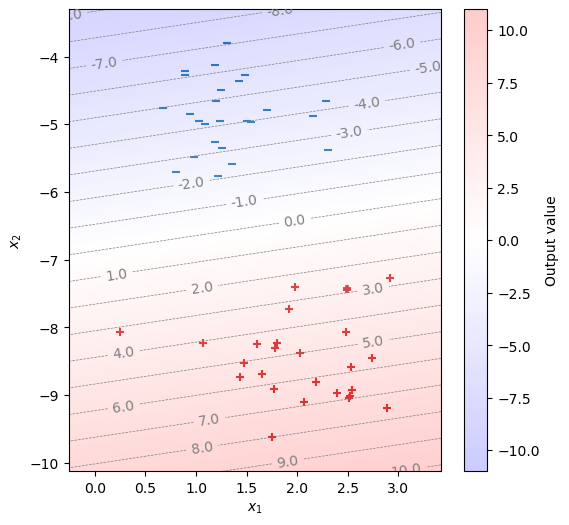

In [82]:
fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model)
plt.show()

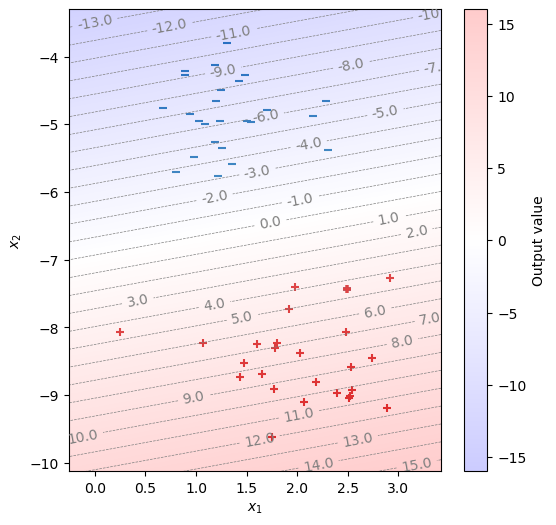

In [83]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Single-layer NN: 2 -> 1
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model)
plt.show()

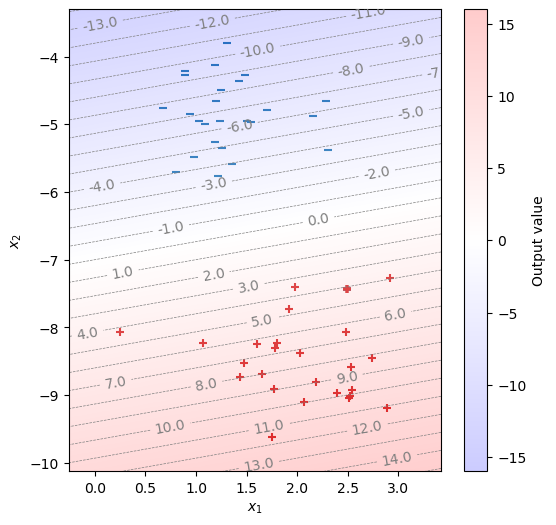

In [84]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Define a neural network as a class.
class SingleLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.linear1 = torch.nn.Linear(d_in, d_out, bias=True)

    def forward(self, x):
        return self.linear1(x)

model = SingleLayerNN(2, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model)
plt.show()

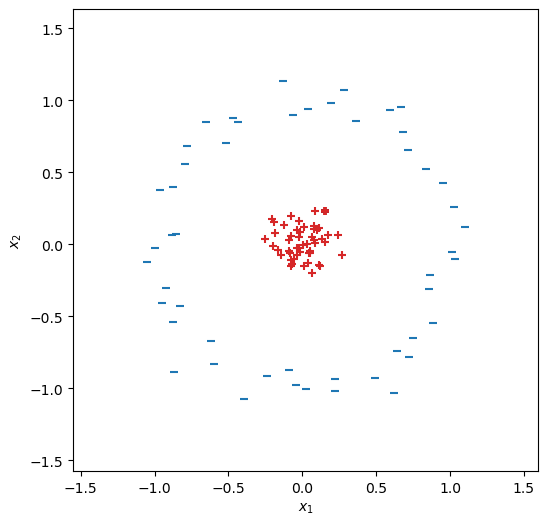

In [85]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_circles

D = make_circles(100, factor=.1, noise=.1, random_state=9)

dtype = torch.float
X = torch.from_numpy(D[0]).type(dtype)
Y = torch.from_numpy(D[1].reshape(-1, 1)).type(dtype)

fig, ax = init_graph(X)
plot_data(ax, X, Y)
plt.show()

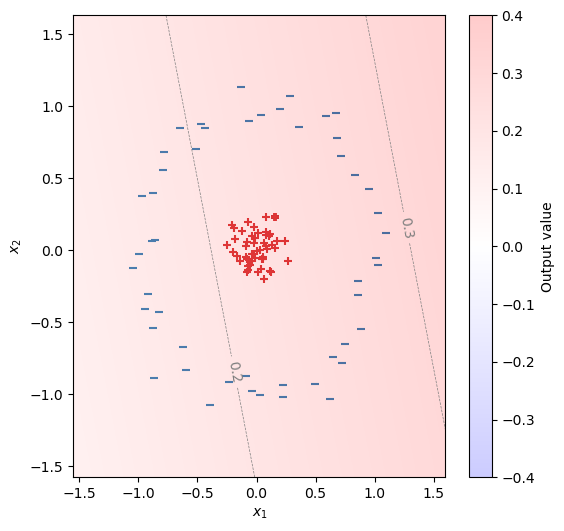

In [86]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Single-layer NN: 2 -> 1
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model, 0.1)
plt.show()

In [87]:
    torch.nn.Linear(2, 4, bias=True),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4, 1, bias=True),

(Linear(in_features=4, out_features=1, bias=True),)

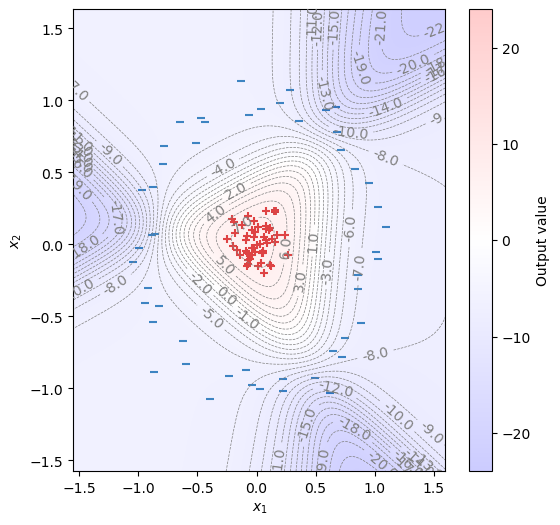

In [88]:
# Create a data loader with batch size of 4.
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Two-layer NN: 2 -> 4 -> 1
model = torch.nn.Sequential(
    torch.nn.Linear(2, 4, bias=True),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4, 1, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

fig, ax = init_graph(X)
plot_data(ax, X, Y)
draw_heatmap(fig, ax, model)
plt.show()